In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from psynlig import pca_loadings_map
from psynlig import pca_explained_variance_bar

In [2]:
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}
sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]
colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]

In [3]:
df1 = pd.read_csv('SARS-CoV-2-MutSpec/viral_spectra/taxid_virus_type.csv', index_col='Unnamed: 0')

In [4]:
df1['taxid'] = df1['taxid'].astype(int)

In [5]:
# df1

In [6]:
df1['taxname'] = df1['species'].str.split('__').str[0]

In [7]:
dfms12covid = pd.read_csv('SARS-CoV-2-MutSpec/data/spectra_verification/spectra12.csv')

In [8]:
# dfms12covid

In [9]:
dfms12covid['taxid'] = 2697049

In [10]:
covid_df = dfms12covid.pivot(columns='Mut', values='MutSpec_syn', index='taxid').reset_index()

In [11]:
covid_df['taxname'] = 'SARS-CoV-2 20A'
covid_df['Type'] = '+'
covid_df['df'] = 'SARS-CoV-2'

In [12]:
covid_df

Mut,taxid,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,taxname,Type,df
0,2697049,0.008456,0.043683,0.016847,0.018512,0.006546,0.359408,0.126578,0.013433,0.240327,0.009145,0.129486,0.027579,SARS-CoV-2 20A,+,SARS-CoV-2


In [13]:
dfms12kelly = pd.read_json('SARS-CoV-2-MutSpec/data/external/other_virus_spectra_Bloom_etal.json', orient='index')
dfms12kelly

,mutation_counts,mutation_spectrum,ff_syn_states,empirical_frequencies,equilibrium_frequencies
flu_h3n2,"{'TtoG': 248, 'CtoT': 2803, 'TtoC': 2907, 'Ato...","{'TtoG': 0.5714285714285711, 'CtoT': 8.3422619...","{'C': 336, 'G': 320, 'T': 434, 'A': 649}","{'A': 0.373202990224266, 'C': 0.19321449108683...","{'A': 0.42242685568570304, 'C': 0.171414691260..."
flu_h1n1pdm,"{'TtoG': 197, 'CtoA': 738, 'AtoG': 2887, 'AtoC...","{'TtoG': 0.571014492753623, 'CtoA': 2.40390879...","{'C': 307, 'G': 292, 'T': 345, 'A': 648}","{'A': 0.407035175879396, 'C': 0.19283919597989...","{'A': 0.415658700288265, 'C': 0.17873763350744..."
flu_vic,"{'TtoG': 93, 'CtoT': 1317, 'TtoA': 146, 'AtoG'...","{'TtoG': 0.2421875, 'CtoT': 4.914179104477612,...","{'T': 384, 'C': 268, 'G': 214, 'A': 675}","{'A': 0.43802725502920103, 'C': 0.173913043478...","{'A': 0.46217115107203205, 'C': 0.143310689913..."
flu_yam,"{'AtoG': 2039, 'GtoA': 1940, 'CtoA': 407, 'Gto...","{'AtoG': 2.976642335766423, 'GtoA': 9.28229665...","{'T': 392, 'C': 259, 'A': 685, 'G': 209}","{'A': 0.44336569579288004, 'C': 0.167637540453...","{'A': 0.47860872017208705, 'C': 0.135158487906..."
rsv-a,"{'AtoG': 1031, 'GtoA': 1009, 'TtoC': 1471, 'Ct...","{'AtoG': 1.7654109589041092, 'GtoA': 8.4083333...","{'C': 214, 'A': 584, 'T': 487, 'G': 120}","{'A': 0.415658362989323, 'C': 0.15231316725978...","{'A': 0.414177787977114, 'C': 0.13581810710441..."
rsv-b,"{'TtoA': 229, 'TtoC': 1352, 'AtoT': 359, 'GtoA...","{'TtoA': 0.46262626262626205, 'TtoC': 2.731313...","{'G': 126, 'A': 629, 'T': 495, 'C': 191}","{'A': 0.43650242886884105, 'C': 0.132546842470...","{'A': 0.42467669026987004, 'C': 0.137065139849..."
evD68,"{'TtoC': 1822, 'GtoA': 1389, 'CtoT': 2163, 'At...","{'TtoC': 3.196491228070175, 'GtoA': 6.43055555...","{'A': 750, 'T': 570, 'C': 318, 'G': 216}","{'A': 0.40453074433656905, 'C': 0.171521035598...","{'A': 0.328219650277404, 'C': 0.17435845058107..."
evA71,"{'CtoT': 6169, 'AtoG': 4230, 'GtoA': 3603, 'Tt...","{'CtoT': 11.257299270072993, 'AtoG': 7.8044280...","{'C': 548, 'A': 542, 'G': 388, 'T': 542}","{'A': 0.268316831683168, 'C': 0.27128712871287...","{'A': 0.27137818535691605, 'C': 0.235645202615..."
denv1,"{'GtoA': 3040, 'TtoC': 4224, 'CtoA': 463, 'Gto...","{'GtoA': 9.559748427672956, 'TtoC': 13.9405940...","{'G': 318, 'T': 303, 'A': 640, 'C': 344}","{'A': 0.39875389408099604, 'C': 0.214330218068...","{'A': 0.40615094353492304, 'C': 0.190453133681..."
denv2,"{'GtoA': 3016, 'GtoC': 170, 'CtoT': 4870, 'Tto...","{'GtoA': 10.36426116838488, 'GtoC': 0.58419243...","{'G': 291, 'T': 273, 'C': 340, 'A': 636}","{'A': 0.412987012987013, 'C': 0.22077922077922...","{'A': 0.40867024484871706, 'C': 0.214919699706..."


In [14]:
dfms12kelly = dfms12kelly.reset_index().rename(columns={'index':'virusname'})

In [15]:
dfms12kelly

,virusname,mutation_counts,mutation_spectrum,ff_syn_states,empirical_frequencies,equilibrium_frequencies
0,flu_h3n2,"{'TtoG': 248, 'CtoT': 2803, 'TtoC': 2907, 'Ato...","{'TtoG': 0.5714285714285711, 'CtoT': 8.3422619...","{'C': 336, 'G': 320, 'T': 434, 'A': 649}","{'A': 0.373202990224266, 'C': 0.19321449108683...","{'A': 0.42242685568570304, 'C': 0.171414691260..."
1,flu_h1n1pdm,"{'TtoG': 197, 'CtoA': 738, 'AtoG': 2887, 'AtoC...","{'TtoG': 0.571014492753623, 'CtoA': 2.40390879...","{'C': 307, 'G': 292, 'T': 345, 'A': 648}","{'A': 0.407035175879396, 'C': 0.19283919597989...","{'A': 0.415658700288265, 'C': 0.17873763350744..."
2,flu_vic,"{'TtoG': 93, 'CtoT': 1317, 'TtoA': 146, 'AtoG'...","{'TtoG': 0.2421875, 'CtoT': 4.914179104477612,...","{'T': 384, 'C': 268, 'G': 214, 'A': 675}","{'A': 0.43802725502920103, 'C': 0.173913043478...","{'A': 0.46217115107203205, 'C': 0.143310689913..."
3,flu_yam,"{'AtoG': 2039, 'GtoA': 1940, 'CtoA': 407, 'Gto...","{'AtoG': 2.976642335766423, 'GtoA': 9.28229665...","{'T': 392, 'C': 259, 'A': 685, 'G': 209}","{'A': 0.44336569579288004, 'C': 0.167637540453...","{'A': 0.47860872017208705, 'C': 0.135158487906..."
4,rsv-a,"{'AtoG': 1031, 'GtoA': 1009, 'TtoC': 1471, 'Ct...","{'AtoG': 1.7654109589041092, 'GtoA': 8.4083333...","{'C': 214, 'A': 584, 'T': 487, 'G': 120}","{'A': 0.415658362989323, 'C': 0.15231316725978...","{'A': 0.414177787977114, 'C': 0.13581810710441..."
5,rsv-b,"{'TtoA': 229, 'TtoC': 1352, 'AtoT': 359, 'GtoA...","{'TtoA': 0.46262626262626205, 'TtoC': 2.731313...","{'G': 126, 'A': 629, 'T': 495, 'C': 191}","{'A': 0.43650242886884105, 'C': 0.132546842470...","{'A': 0.42467669026987004, 'C': 0.137065139849..."
6,evD68,"{'TtoC': 1822, 'GtoA': 1389, 'CtoT': 2163, 'At...","{'TtoC': 3.196491228070175, 'GtoA': 6.43055555...","{'A': 750, 'T': 570, 'C': 318, 'G': 216}","{'A': 0.40453074433656905, 'C': 0.171521035598...","{'A': 0.328219650277404, 'C': 0.17435845058107..."
7,evA71,"{'CtoT': 6169, 'AtoG': 4230, 'GtoA': 3603, 'Tt...","{'CtoT': 11.257299270072993, 'AtoG': 7.8044280...","{'C': 548, 'A': 542, 'G': 388, 'T': 542}","{'A': 0.268316831683168, 'C': 0.27128712871287...","{'A': 0.27137818535691605, 'C': 0.235645202615..."
8,denv1,"{'GtoA': 3040, 'TtoC': 4224, 'CtoA': 463, 'Gto...","{'GtoA': 9.559748427672956, 'TtoC': 13.9405940...","{'G': 318, 'T': 303, 'A': 640, 'C': 344}","{'A': 0.39875389408099604, 'C': 0.214330218068...","{'A': 0.40615094353492304, 'C': 0.190453133681..."
9,denv2,"{'GtoA': 3016, 'GtoC': 170, 'CtoT': 4870, 'Tto...","{'GtoA': 10.36426116838488, 'GtoC': 0.58419243...","{'G': 291, 'T': 273, 'C': 340, 'A': 636}","{'A': 0.412987012987013, 'C': 0.22077922077922...","{'A': 0.40867024484871706, 'C': 0.214919699706..."


In [16]:
kelly_virus_df = dfms12kelly['mutation_spectrum'].apply(pd.Series)
kelly_virus_df.columns = kelly_virus_df.columns.str.replace('to', '>')
kelly_virus_df = kelly_virus_df.div(kelly_virus_df.sum(axis=1), axis=0)
kelly_virus_df

,T>G,C>T,T>C,A>G,G>A,A>T,C>A,T>A,A>C,G>T,C>G,G>C
0,0.013431,0.196083,0.157439,0.131938,0.335605,0.018434,0.067506,0.019876,0.013002,0.039958,0.002099,0.004628
1,0.015716,0.194899,0.156519,0.122620,0.325181,0.022171,0.066162,0.025369,0.015630,0.045243,0.004931,0.005561
2,0.010400,0.211020,0.133855,0.120362,0.379445,0.011133,0.060726,0.016327,0.010306,0.040934,0.002884,0.002609
3,0.010085,0.223910,0.144512,0.117671,0.366943,0.010157,0.062121,0.013412,0.007849,0.036883,0.003053,0.003405
4,0.008174,0.290197,0.120245,0.070279,0.334728,0.038923,0.053017,0.033842,0.007703,0.040141,0.002418,0.000332
5,0.007654,0.302556,0.130986,0.073270,0.344073,0.027371,0.050217,0.022186,0.006557,0.032733,0.001255,0.001142
6,0.002727,0.330388,0.155263,0.126225,0.312351,0.014119,0.012983,0.013464,0.003692,0.008320,0.004277,0.016191
7,0.012561,0.252110,0.213292,0.174782,0.207964,0.030948,0.016551,0.035659,0.011776,0.018932,0.009032,0.016392
8,0.010890,0.280289,0.283934,0.106834,0.194708,0.017726,0.027413,0.038517,0.007765,0.016525,0.005921,0.009479
9,0.011173,0.264785,0.317783,0.095366,0.191594,0.016655,0.022890,0.038259,0.008255,0.015754,0.006688,0.010799


In [17]:
kelly_virus_df['virusname'] = dfms12kelly['virusname']

In [18]:
kelly_virus_df

,T>G,C>T,T>C,A>G,G>A,A>T,C>A,T>A,A>C,G>T,C>G,G>C,virusname
0,0.013431,0.196083,0.157439,0.131938,0.335605,0.018434,0.067506,0.019876,0.013002,0.039958,0.002099,0.004628,flu_h3n2
1,0.015716,0.194899,0.156519,0.122620,0.325181,0.022171,0.066162,0.025369,0.015630,0.045243,0.004931,0.005561,flu_h1n1pdm
2,0.010400,0.211020,0.133855,0.120362,0.379445,0.011133,0.060726,0.016327,0.010306,0.040934,0.002884,0.002609,flu_vic
3,0.010085,0.223910,0.144512,0.117671,0.366943,0.010157,0.062121,0.013412,0.007849,0.036883,0.003053,0.003405,flu_yam
4,0.008174,0.290197,0.120245,0.070279,0.334728,0.038923,0.053017,0.033842,0.007703,0.040141,0.002418,0.000332,rsv-a
5,0.007654,0.302556,0.130986,0.073270,0.344073,0.027371,0.050217,0.022186,0.006557,0.032733,0.001255,0.001142,rsv-b
6,0.002727,0.330388,0.155263,0.126225,0.312351,0.014119,0.012983,0.013464,0.003692,0.008320,0.004277,0.016191,evD68
7,0.012561,0.252110,0.213292,0.174782,0.207964,0.030948,0.016551,0.035659,0.011776,0.018932,0.009032,0.016392,evA71
8,0.010890,0.280289,0.283934,0.106834,0.194708,0.017726,0.027413,0.038517,0.007765,0.016525,0.005921,0.009479,denv1
9,0.011173,0.264785,0.317783,0.095366,0.191594,0.016655,0.022890,0.038259,0.008255,0.015754,0.006688,0.010799,denv2


In [19]:
kelly_taxname = ['Influenza A H3N2', 'Influenza A H1N1', 'Influenza B Victoria', 
                 'Influenza B Yamagata', 'RSV-A', 'RSV-B', 'Enterovirus D68', 
                 'Enterovirus A71', 'Dengue virus 1', 'Dengue virus 2', 
                 'Dengue virus 3', 'Dengue virus 4', 'West Nile virus']

In [20]:
kelly_type = ['-', '-', '-', 
              '-', '-', '-', '+',
              '+', '+', '+', 
              '+', '+', '+']

In [21]:
kelly_virus_df['taxname'] = kelly_taxname
kelly_virus_df['Type'] = kelly_type
kelly_virus_df['df'] = 'kelly'

In [22]:
dfms12syn = pd.read_csv('SARS-CoV-2-MutSpec/viral_spectra/ms12syn_all_virus.csv', index_col='Unnamed: 0')

In [23]:
dfms12syn

,Mut,ObsNum,ExpNum,MutSpec,MutSpec_q05,MutSpec_median,MutSpec_q95,taxid
0,A>C,36.70270,202.2300,0.034784,0.022643,0.035047,0.044282,10990
1,A>G,198.66800,439.5780,0.086621,0.075908,0.086631,0.096035,10990
2,A>T,22.77440,161.0210,0.027108,0.016305,0.026067,0.034970,10990
3,C>A,17.76760,76.0393,0.044784,0.028092,0.046021,0.060705,10990
4,C>G,1.99772,55.9279,0.006846,0.000000,0.006849,0.014763,10990
...,...,...,...,...,...,...,...,...
7,G>C,2.13421,72.8211,0.003805,0.000000,0.003394,0.007554,77763
8,G>T,50.06880,72.8211,0.089263,0.066487,0.086102,0.114044,77763
9,T>A,49.02400,198.8740,0.032003,0.025325,0.032111,0.040197,77763
10,T>C,478.02300,482.0980,0.128729,0.111404,0.130994,0.142362,77763


In [24]:
virus_df = dfms12syn.pivot(index='taxid', columns='Mut', values='MutSpec').reset_index()

In [25]:
virus_df

Mut,taxid,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G
0,10990,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356
1,11082,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165
2,11320_1,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,0.126587,0.004907
3,11320_2,0.014931,0.121275,0.013348,0.068972,0.000000,0.163883,0.338085,0.000000,0.059463,0.034505,0.154705,0.030834
4,1133363,0.011045,0.088090,0.012108,0.024471,0.000000,0.267609,0.358169,0.053221,0.013306,0.019779,0.145658,0.006544
5,1157337,0.027282,0.218221,0.015635,0.024980,0.000000,0.193427,0.279178,0.000000,0.026094,0.023477,0.191706,0.000000
6,118655,0.004384,0.131054,0.008711,0.030561,0.037705,0.254494,0.281585,0.014140,0.061028,0.022270,0.134087,0.019982
7,11983,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309
8,12110,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203
9,12162,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185


In [26]:
virus_df['taxid'] = virus_df['taxid'].str.split('_').str[0].str.split('(').str[0].astype(int)

In [27]:
virus_df = virus_df.merge(df1[['taxid', 'Type', 'taxname']], how='left')

In [28]:
virus_df[virus_df.Type.isna()]

,taxid,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname
2,11320,0.008852,0.143715,0.014274,0.079285,0.0,0.198377,0.334457,0.0,0.058034,0.031512,0.126587,0.004907,NaN,NaN
3,11320,0.014931,0.121275,0.013348,0.068972,0.0,0.163883,0.338085,0.0,0.059463,0.034505,0.154705,0.030834,NaN,NaN


In [29]:
virus_df.loc[2, 'Type'] = '-'
virus_df.loc[3, 'Type'] = '-'
# virus_df.loc[4, 'Type'] = '-'
# virus_df.loc[6, 'Type'] = '-'
# virus_df.loc[20, 'Type'] = '-'
# virus_df.loc[24, 'Type'] = '+'

In [30]:
virus_df.loc[2, 'taxname'] = 'Influenza A virus'
virus_df.loc[3, 'taxname'] = 'Influenza A virus'
# virus_df.loc[4, 'taxname'] = 'Schmallenberg virus'
# virus_df.loc[6, 'taxname'] = 'Oropouche virus'
# virus_df.loc[20, 'taxname'] = 'Orthohantavirus puumalaense'
# virus_df.loc[24, 'taxname'] = 'GB virus C'

In [31]:
virus_df['df'] = 'nemu'

In [32]:
virus_df

,taxid,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df
0,10990,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu
1,11082,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu
2,11320,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,0.126587,0.004907,-,Influenza A virus,nemu
3,11320,0.014931,0.121275,0.013348,0.068972,0.000000,0.163883,0.338085,0.000000,0.059463,0.034505,0.154705,0.030834,-,Influenza A virus,nemu
4,1133363,0.011045,0.088090,0.012108,0.024471,0.000000,0.267609,0.358169,0.053221,0.013306,0.019779,0.145658,0.006544,-,Schmallenberg orthobunyavirus,nemu
5,1157337,0.027282,0.218221,0.015635,0.024980,0.000000,0.193427,0.279178,0.000000,0.026094,0.023477,0.191706,0.000000,ds,Piscine orthoreovirus,nemu
6,118655,0.004384,0.131054,0.008711,0.030561,0.037705,0.254494,0.281585,0.014140,0.061028,0.022270,0.134087,0.019982,-,Oropouche orthobunyavirus,nemu
7,11983,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu
8,12110,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203,+,Foot-and-mouth disease virus,nemu
9,12162,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185,+,Citrus tristeza virus,nemu


In [33]:
all_virus = pd.concat([virus_df, covid_df, kelly_virus_df]).reset_index(drop=True)

In [34]:
all_virus

,taxid,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,virusname
0,10990.0,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,NaN
1,11082.0,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,NaN
2,11320.0,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,0.126587,0.004907,-,Influenza A virus,nemu,NaN
3,11320.0,0.014931,0.121275,0.013348,0.068972,0.000000,0.163883,0.338085,0.000000,0.059463,0.034505,0.154705,0.030834,-,Influenza A virus,nemu,NaN
4,1133363.0,0.011045,0.088090,0.012108,0.024471,0.000000,0.267609,0.358169,0.053221,0.013306,0.019779,0.145658,0.006544,-,Schmallenberg orthobunyavirus,nemu,NaN
5,1157337.0,0.027282,0.218221,0.015635,0.024980,0.000000,0.193427,0.279178,0.000000,0.026094,0.023477,0.191706,0.000000,ds,Piscine orthoreovirus,nemu,NaN
6,118655.0,0.004384,0.131054,0.008711,0.030561,0.037705,0.254494,0.281585,0.014140,0.061028,0.022270,0.134087,0.019982,-,Oropouche orthobunyavirus,nemu,NaN
7,11983.0,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,NaN
8,12110.0,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203,+,Foot-and-mouth disease virus,nemu,NaN
9,12162.0,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185,+,Citrus tristeza virus,nemu,NaN


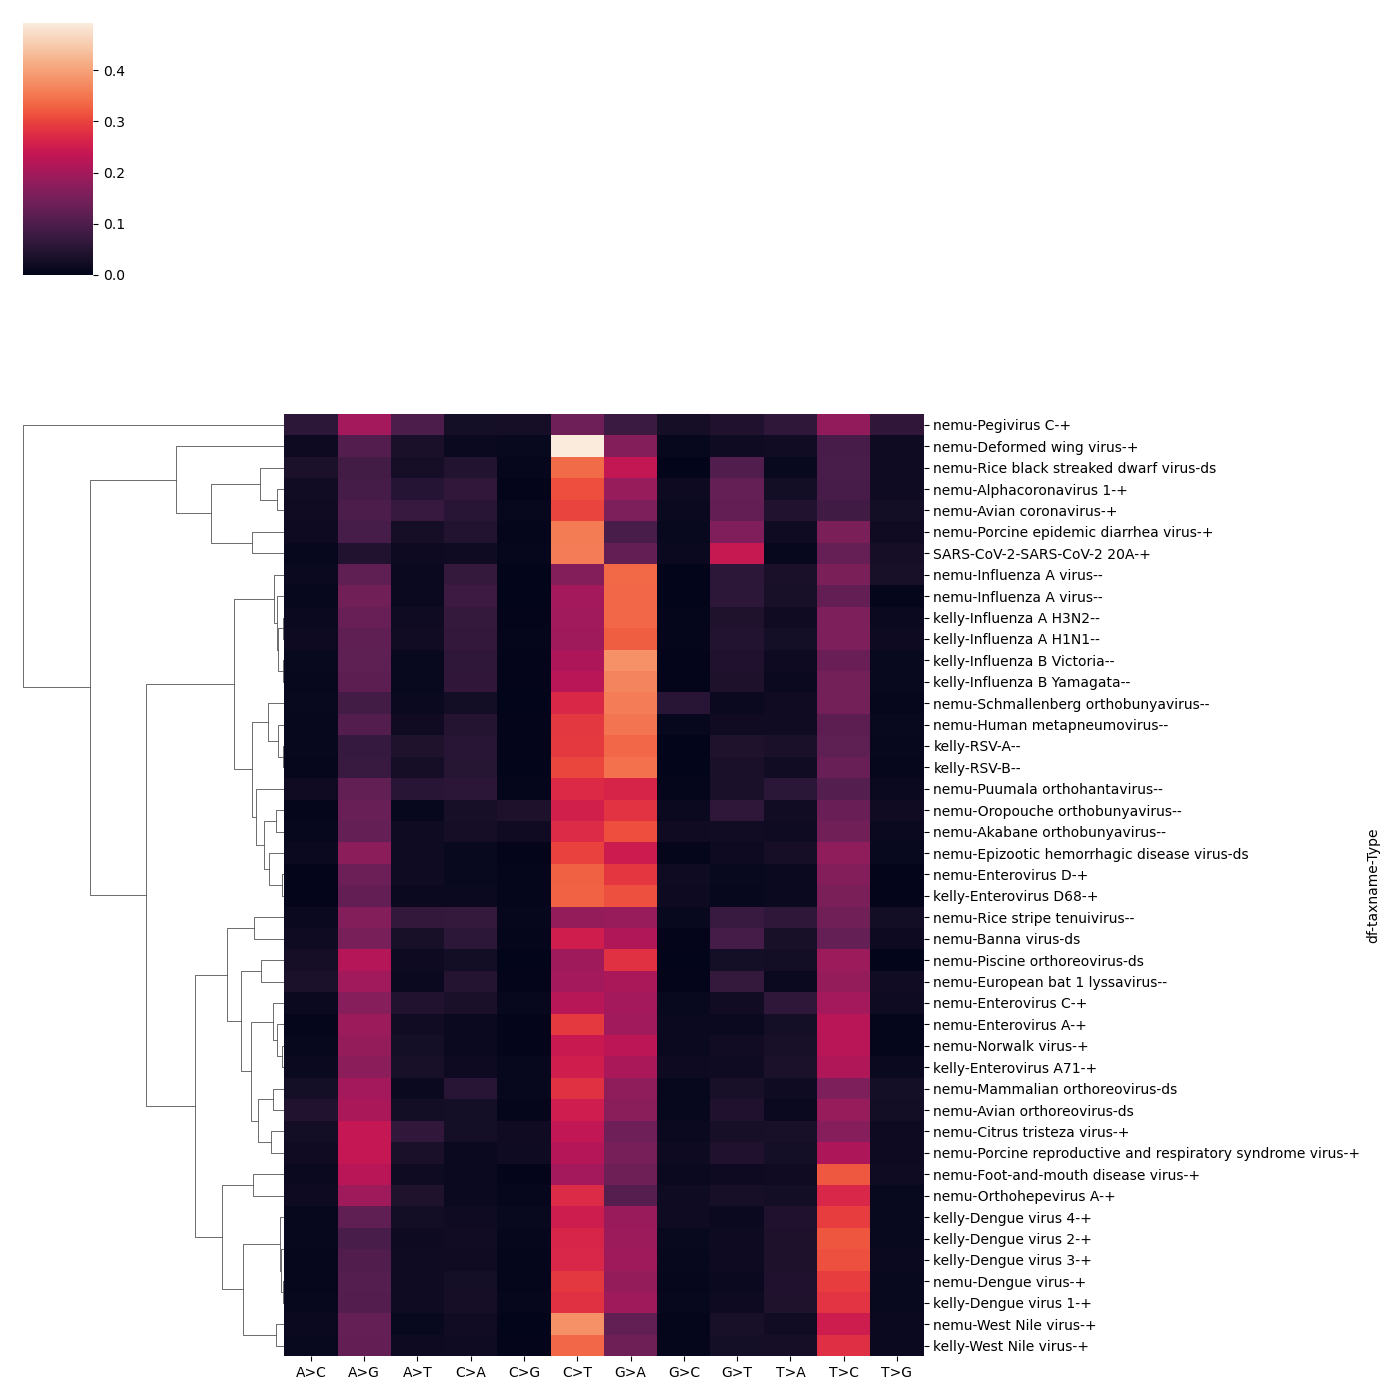

In [35]:
g = sns.clustermap(all_virus.set_index(['df', 'taxname', 'Type']).drop(['taxid', 'virusname'],axis=1),
               metric='cosine', col_cluster=False, figsize=(14, 14), dendrogram_ratio=0.3
              )
# g.savefig('./SARS-CoV-2-MutSpec/viral_spectra/figures/viruses_clustermap.pdf')

In [36]:
pca_data_only = all_virus.drop(['taxid', 'Type', 'taxname', 'virusname', 'df'], axis=1)

In [37]:
# pca_data_only = dfms12syn.pivot(index='taxid', columns='Mut', values='MutSpec')

In [38]:
pca_data_only

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G
0,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356
1,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165
2,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,0.126587,0.004907
3,0.014931,0.121275,0.013348,0.068972,0.000000,0.163883,0.338085,0.000000,0.059463,0.034505,0.154705,0.030834
4,0.011045,0.088090,0.012108,0.024471,0.000000,0.267609,0.358169,0.053221,0.013306,0.019779,0.145658,0.006544
5,0.027282,0.218221,0.015635,0.024980,0.000000,0.193427,0.279178,0.000000,0.026094,0.023477,0.191706,0.000000
6,0.004384,0.131054,0.008711,0.030561,0.037705,0.254494,0.281585,0.014140,0.061028,0.022270,0.134087,0.019982
7,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309
8,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203
9,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185


In [39]:
model = PCA(n_components=12).fit(pca_data_only)
pca_model = model.transform(pca_data_only)
#pca_model = pca.fit_transform(pca_data_only)
pca_data = pd.DataFrame(pca_model, columns=["pc"+str(i+1) for i in range(len(pca_data_only.columns))])
pca_data1 = pca_data[["pc1","pc2"]].copy()

In [40]:
pca_data1.head()

,pc1,pc2
0,0.048995,0.126480
1,-0.128341,0.073523
2,0.127791,-0.047197
3,0.123670,-0.075018
4,0.136776,-0.007924


In [41]:
pca_data_plot = pca_data1.copy()

In [42]:
pca_data_plot['Type'] = all_virus['Type']
pca_data_plot['taxname'] = all_virus['taxname']
pca_data_plot['df'] = all_virus['df']

In [43]:
pca_data_plot

,pc1,pc2,Type,taxname,df
0,0.048995,0.126480,ds,Rice black streaked dwarf virus,nemu
1,-0.128341,0.073523,+,West Nile virus,nemu
2,0.127791,-0.047197,-,Influenza A virus,nemu
3,0.123670,-0.075018,-,Influenza A virus,nemu
4,0.136776,-0.007924,-,Schmallenberg orthobunyavirus,nemu
5,0.029454,-0.104985,ds,Piscine orthoreovirus,nemu
6,0.069810,0.007329,-,Oropouche orthobunyavirus,nemu
7,-0.028726,-0.060763,+,Norwalk virus,nemu
8,-0.152724,-0.125070,+,Foot-and-mouth disease virus,nemu
9,-0.088337,-0.037603,+,Citrus tristeza virus,nemu


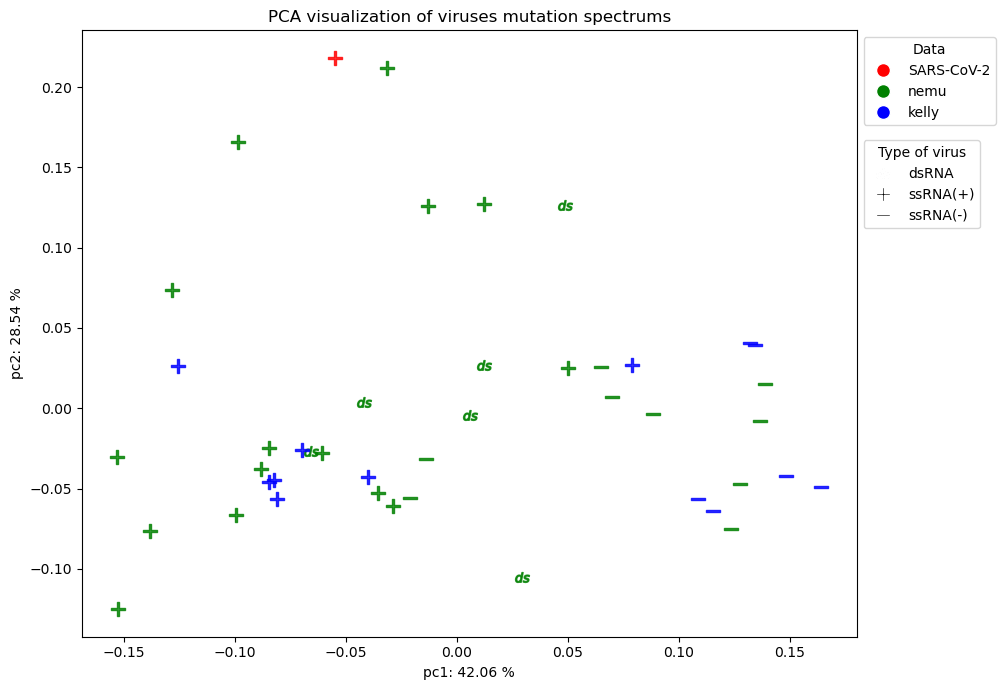

In [44]:
colors = {'SARS-CoV-2':'r', 'nemu':'g', 'kelly':'b'}
markers={'ds':'$ds$', '+':'$+$', '-':'$-$'}
types_rna_virus = ['dsRNA', 'ssRNA(+)', 'ssRNA(-)']

# Создаем график
fig, ax = plt.subplots(figsize=(10,7))

# Отображаем точки с учетом цветов и маркеров
for df in pca_data_plot['df'].unique():
    for Type in pca_data_plot['Type'].unique():
        indices = (pca_data_plot['df'] == df) & (pca_data_plot['Type'] == Type)
        ax.scatter(pca_data_plot.loc[indices, 'pc1'], pca_data_plot.loc[indices, 'pc2'],
                   s=100, # размер точки
                   alpha=0.8, # непрозрачность
                   c=colors[df], # цвет точки
                   marker=markers[Type] # форма точки
                   )

# Отображаем легенду для цвета
handles_color = [plt.Line2D([0], [0], marker='o', color='w', label=color, markerfacecolor=colors[color], markersize=10) for color in colors]
legend_color = ax.legend(handles=handles_color, title="Data", loc="upper left", bbox_to_anchor=(1, 1))

# Добавляем легенду для типов маркеров
handles_marker = [plt.Line2D([0], [0], marker=markers[marker], color='w', label=type_rna_vir, markerfacecolor='k', markersize=10) for type_rna_vir, marker in zip(types_rna_virus, markers)]
legend_marker = ax.legend(handles=handles_marker, title="Type of virus", loc="upper left", bbox_to_anchor=(1, 0.83))

# # Добавляем обе легенды
ax.add_artist(legend_color)
# ax.add_artist(legend_marker)

ax.set_xlabel('pc1: {:.2f} %'.format(model.explained_variance_ratio_[0]*100))
ax.set_ylabel('pc2: {:.2f} %'.format(model.explained_variance_ratio_[1]*100))
ax.set_title('PCA visualization of viruses mutation spectrums')

# plt.subplots_adjust(right=0.7)
fig.tight_layout()
plt.show()

# fig.savefig('./SARS-CoV-2-MutSpec/viral_spectra/figures/PCA_nemu_kelly.pdf', bbox_inches='tight', pad_inches=0.7)

In [45]:
# x = C>T/G>A
# y = A>G/T>C

In [46]:
pca_data_plot['C>T/G>A'] = all_virus['C>T']/all_virus['G>A']
pca_data_plot['A>G/T>C'] = all_virus['A>G']/all_virus['T>C']

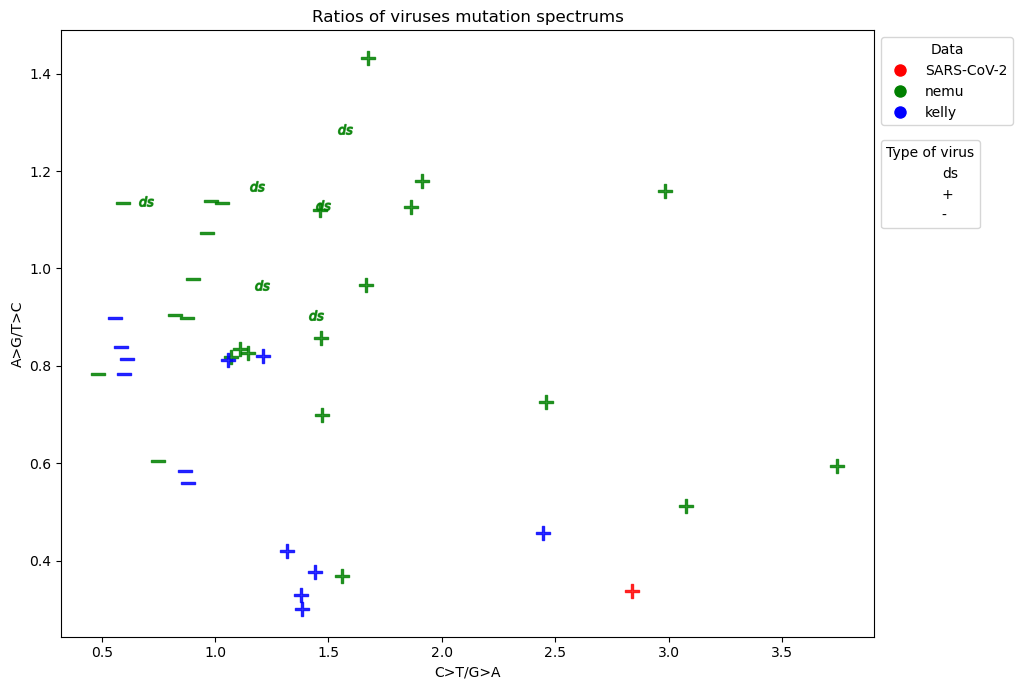

In [47]:
colors = {'SARS-CoV-2':'r', 'nemu':'g', 'kelly':'b'}
markers={'ds':'$ds$', '+':'$+$', '-':'$-$'}

# Создаем график
fig, ax = plt.subplots(figsize=(10,7))

# Отображаем точки с учетом цветов и маркеров
for df in pca_data_plot['df'].unique():
    for Type in pca_data_plot['Type'].unique():
        indices = (pca_data_plot['df'] == df) & (pca_data_plot['Type'] == Type)
        ax.scatter(pca_data_plot.loc[indices, 'C>T/G>A'], pca_data_plot.loc[indices, 'A>G/T>C'],
                   s=100, # размер точки
                   alpha=0.8, # непрозрачность
                   c=colors[df], # цвет точки
                   marker=markers[Type] # форма точки
                   )

# Отображаем легенду для цвета
handles_color = [plt.Line2D([0], [0], marker='o', color='w', label=color, markerfacecolor=colors[color], markersize=10) for color in colors]
legend_color = ax.legend(handles=handles_color, title="Data", loc="upper left", bbox_to_anchor=(1, 1))

# Добавляем легенду для типов маркеров
handles_marker = [plt.Line2D([0], [0], marker=None, color='w', label=marker, markerfacecolor='k', markersize=10) for marker in markers]
legend_marker = ax.legend(handles=handles_marker, title="Type of virus", loc="upper left", bbox_to_anchor=(1, 0.83))

# # Добавляем обе легенды
ax.add_artist(legend_color)
# ax.add_artist(legend_marker)

ax.set_xlabel('C>T/G>A')
ax.set_ylabel('A>G/T>C')
ax.set_title('Ratios of viruses mutation spectrums')

plt.tight_layout()
plt.show()

## Mutations that most affected components

In [48]:
n_pcs= model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

In [49]:
initial_feature_names = list(pca_data_only.columns)
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

df = pd.DataFrame(dic.items())

In [50]:
df

,0,1
0,PC1,G>A
1,PC2,C>T
2,PC3,T>C
3,PC4,A>G
4,PC5,A>T
5,PC6,C>A
6,PC7,A>C
7,PC8,C>G
8,PC9,G>C
9,PC10,T>A


C:\Users\777\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


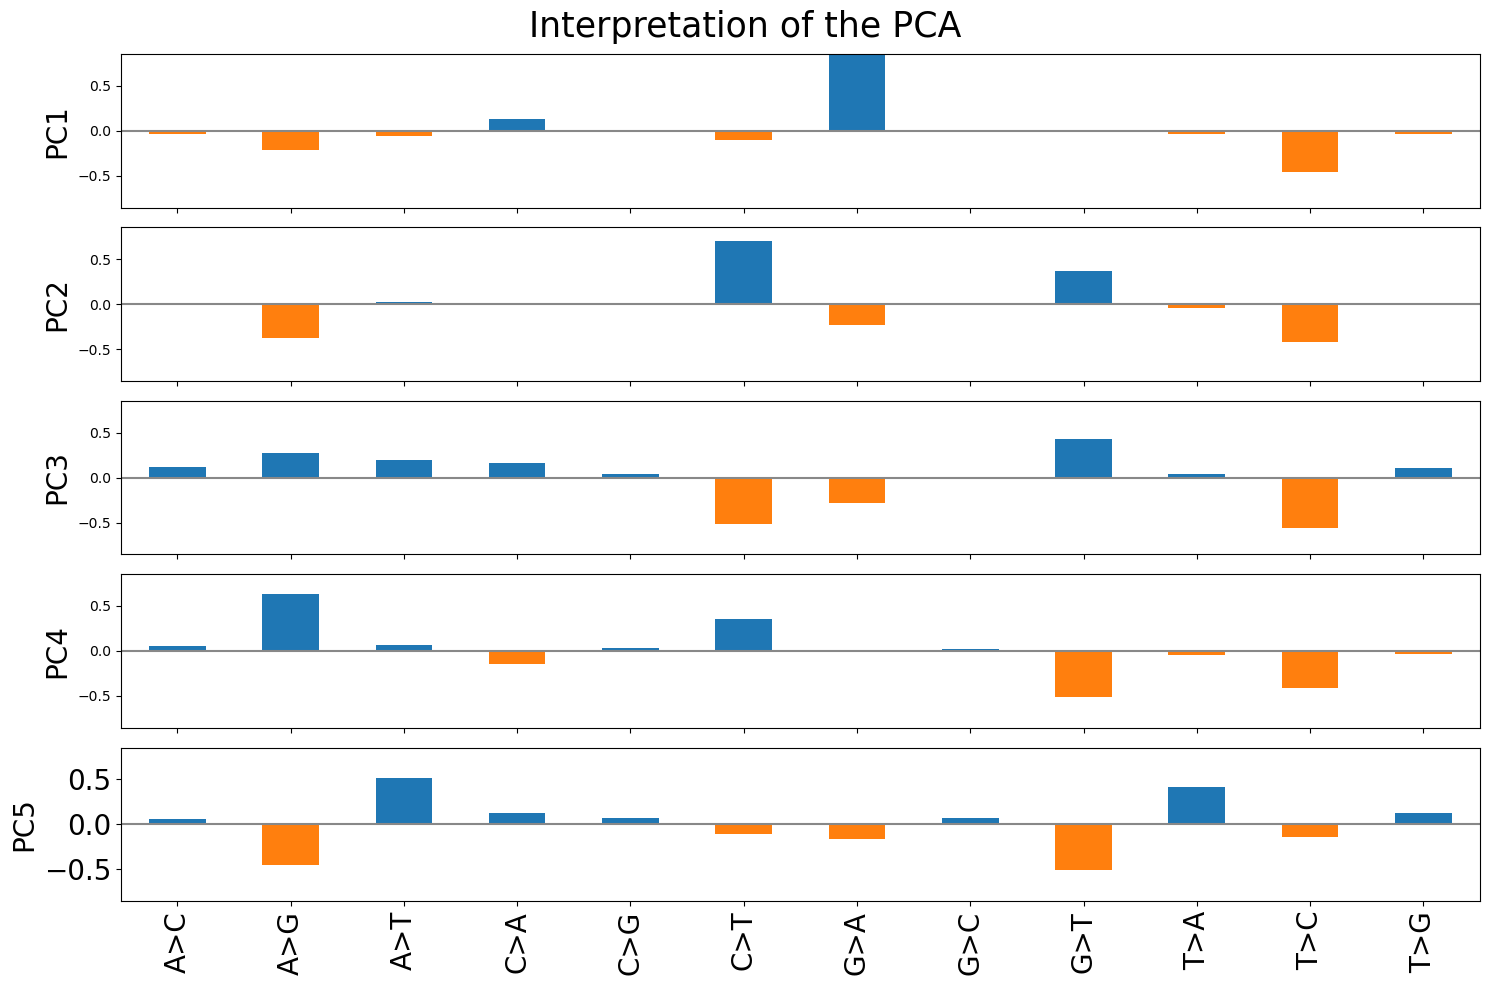

In [51]:
loadings = pd.DataFrame(model.components_[0:5, :], 
                        columns=pca_data_only.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}', fontsize=20)
    ax.set_ylim(-maxPC, maxPC)
plt.suptitle('Interpretation of the PCA', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

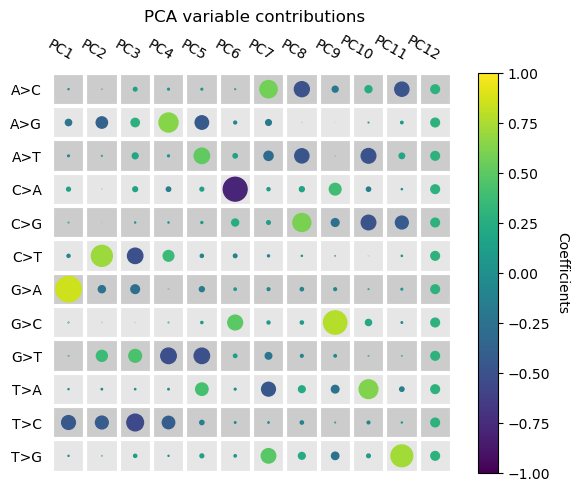

In [52]:
kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
    },
}



pca_loadings_map(
    model,
    pca_data_only.columns,
    bubble=True,
    annotate=False,
    **kwargs
)
plt.suptitle('PCA variable contributions')
plt.show()

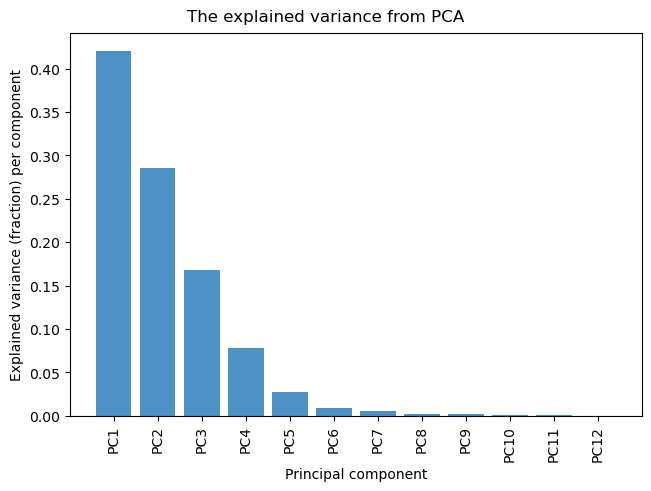

In [53]:
pca_explained_variance_bar(model, alpha=0.8)
plt.suptitle('The explained variance from PCA')
plt.show()